In [24]:
import thinkdsp
import numpy as np
import matplotlib.pyplot as plt
import glob
from struct import pack
import wave
import scipy.io.wavfile


for filename in glob.glob('*.wav'):
	myAudioLeft, myAudioRight = thinkdsp.read_wave("creek.wav")

	audio_len = myAudioLeft.ys.size
	fs = myAudioLeft.framerate
	temp = []
	fade_len = 3*fs
	maxVol=2**15-1.0
	kaiser = np.kaiser(2*fade_len, 5)

#cross kaiser with original wave
	for i in range (0,fade_len-1):    
	    myAudioLeft.ys[i] *= kaiser[i]
	    myAudioLeft.ys[audio_len - fade_len + i] *= kaiser[fade_len + i]
	    myAudioRight.ys[i] *= kaiser[i]
	    myAudioRight.ys[audio_len - fade_len + i] *= kaiser[fade_len + i]

# write 2-period crossfade  
	my_ys_left = (myAudioLeft.ys)
	my_ys_right =(myAudioRight.ys)

	tl = my_ys_left[fade_len:]
	my_ys_left = np.concatenate((my_ys_left,tl))

	tr = my_ys_right[fade_len:]
	my_ys_right = np.concatenate((my_ys_right,tr))

	for i in range(0,fade_len-1):
	    my_ys_left[audio_len - fade_len + i] += my_ys_left[i]
	    my_ys_right[audio_len - fade_len + i] += my_ys_right[i]
  
	my_ys_left = (maxVol*my_ys_left)
	my_ys_right = (maxVol*my_ys_right)


	my_ys = np.vstack((my_ys_left,my_ys_right))
    
	wvData = my_ys.T.astype('int16').tostring()

	wv = wave.open('crossfaded wave samples/2periods_stereo.wav', 'wb')
	wv.setparams((2, 2, fs, audio_len, 'NONE', 'not compressed'))

	wv.writeframes(wvData)
	wv.close()
    
    
# write 1-period crossfade
	my_ys_left = (myAudioLeft.ys)
	my_ys_right =(myAudioRight.ys)

	for i in range(0,fade_len - 1):
	    my_ys_left[i] += my_ys_left[audio_len - fade_len + i]
	    my_ys_left[audio_len - fade_len + i] = my_ys_left[i]
	    my_ys_right[i] += my_ys_right[audio_len - fade_len + i]
	    my_ys_right[audio_len - fade_len + i] = my_ys_right[i]
        
	my_ys_left = (maxVol*my_ys_left)
	my_ys_right = (maxVol*my_ys_right)
    
	my_ys = np.vstack((my_ys_left,my_ys_right))
    
	wvData = my_ys.T.astype('int16').tostring()

	wv = wave.open('crossfaded wave samples/1period_stereo.wav', 'wb')
	wv.setparams((2, 2, fs, audio_len, 'NONE', 'not compressed'))

	wv.writeframes(wvData)
	wv.close()
    
    
    
    
    

In [14]:
my_ys.shape

(2, 1860560)

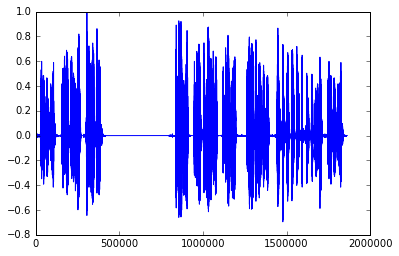

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

myAudioLeft2, myAudioRight2 = thinkdsp.read_wave("1period_stereo.wav")

plt.plot(myAudioLeft2.ys)

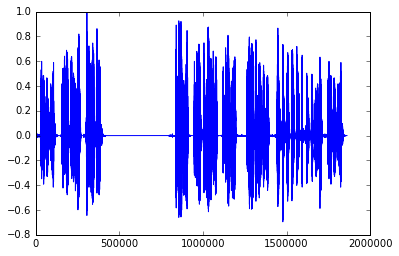

In [15]:
plt.plot(myAudioLeft.ys)

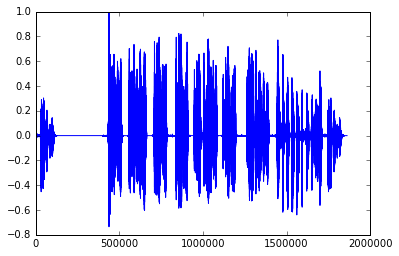

In [5]:
plt.plot(myAudioRight2.ys)

In [30]:
from pyfilterbank import FractionalOctaveFilterbank
from pyfilterbank import octbank
from pylab import plt, np
import thinkdsp
import numpy as np
from scipy import signal
import matplotlib
import wave
#get_ipython().magic('matplotlib inline')

#reading the oceanwave file
myAudioLeft, myAudioRight = thinkdsp.read_wave("crossfaded wave samples/1period_stereo.wav")

#constructing the filterbank
fs = 44100
maxVol= (2**15) - 1
audio_len = myAudioLeft.ys.size
ofb = FractionalOctaveFilterbank(sample_rate = fs, order=30, nth_oct=1, norm_freq = 960,start_band = -5,end_band=4,edge_correction_percent=0.2,filterfun='py')

#x, y, f, Y = octbank.freqz(ofb)
#plt.plot(f, 20 * np.log10(np.angle(Y)),'#000000')
#plt.show()

# octbank.freqz(ofb)

#filtering the wave file
yLeft , states = ofb.filter(myAudioLeft.ys,ffilt=True, states=None)
yRight , states = ofb.filter(myAudioRight.ys,ffilt=True, states=None)

oneL = 0.1*maxVol*yLeft.T[0]
twoL = 0.1*maxVol*yLeft.T[1]
threeL = 0.1*maxVol*yLeft.T[2]
fourL = 0.1*maxVol*yLeft.T[3]
fiveL = 0.1*maxVol*yLeft.T[4]
sixL = 0.09*maxVol*yLeft.T[5]
sevenL = 0.08*maxVol*yLeft.T[6]
eightL = 0.07*maxVol*yLeft.T[7]
nineL = 0.06*maxVol*yLeft.T[8]
tenL = 0.06*maxVol*yLeft.T[9]

oneR = 0.1*maxVol*yRight.T[0]
twoR = 0.1*maxVol*yRight.T[1]
threeR = 0.1*maxVol*yRight.T[2]
fourR = 0.1*maxVol*yRight.T[3]
fiveR = 0.1*maxVol*yRight.T[4]
sixR = 0.09*maxVol*yRight.T[5]
sevenR = 0.08*maxVol*yRight.T[6]
eightR = 0.07*maxVol*yRight.T[7]
nineR = 0.06*maxVol*yRight.T[8]
tenR = 0.06*maxVol*yRight.T[9]

#reading frequency response of each band
w, h = signal.freqz(myAudioLeft.ys)
w1, h1= signal.freqz(oneL)
w2, h2= signal.freqz(twoL)
w3, h3= signal.freqz(threeL)
w4, h4= signal.freqz(fourL)
w5, h5= signal.freqz(fiveL)
w6, h6= signal.freqz(sixL)
w7, h7= signal.freqz(sevenL)
w8, h8= signal.freqz(eightL)
w9, h9= signal.freqz(nineL)
w10, h10= signal.freqz(tenL)

#plotting frequency responses
#fig, ax1 = plt.subplots()

#ax1.plot(w1, 20 * np.log10(abs(h1)),'#a6405f')
#ax1.twinx().plot(w1, 20 * np.log10(abs(h2)),'#b2d6c5')
#ax1.twinx().plot(w1, 20 * np.log10(abs(h3)),'#70968d')
#ax1.twinx().plot(w1, 20 * np.log10(abs(h4)),'#54596b')
#ax1.twinx().plot(w1, 20 * np.log10(abs(h5)),'#4f414a')
#ax1.twinx().plot(w1, 20 * np.log10(abs(h6)),'#a6405f')
#ax1.twinx().plot(w1, 20 * np.log10(abs(h7)),'#b2d6c5')
#ax1.twinx().plot(w1, 20 * np.log10(abs(h8)),'#70968d')
#ax1.twinx().plot(w1, 20 * np.log10(abs(h9)),'#54596b')
#ax1.twinx().plot(w1, 20 * np.log10(abs(h10)),'#4f414a')

#frequency response of the original oceanwave
#ax1.plot(w, 20 * (np.angle(h)),'#000000')

#reconstructing the oceanwave (synthesis)
myYsL = ((oneL)+(twoL)+(threeL)+(fourL)+(fiveL)+(sixL)+(sevenL)+(eightL)+(nineL)+(tenL))
myYsR = ((oneR)+(twoR)+(threeR)+(fourR)+(fiveR)+(sixR)+(sevenR)+(eightR)+(nineR)+(tenR))

myYs = np.vstack((myYsL,myYsR))
wr, hr = signal.freqz(myYsL)
#ax1.twinx().plot(wr, 20 * (np.angle(hr)),'#FF0000')

#plt.show()

wvData = myYs.T.astype('int16').tostring()
wv = wave.open('reconstructed mask/reconstructed.wav', 'wb')
wv.setparams((2, 2, fs, audio_len, 'NONE', 'not compressed'))
wv.writeframes(wvData)
wv.close()

one = np.vstack((oneL,oneR))
wvData = one.T.astype('int16').tostring()
wv = wave.open('10 bands/b0.wav', 'wb')
wv.setparams((2, 2, fs, audio_len, 'NONE', 'not compressed'))
wv.writeframes(wvData)
wv.close()
two = np.vstack((twoL,twoR))
wvData = two.T.astype('int16').tostring()
wv = wave.open('10 bands/b1.wav', 'wb')
wv.setparams((2, 2, fs, audio_len, 'NONE', 'not compressed'))
wv.writeframes(wvData)
wv.close()
three = np.vstack((threeL,threeR))
wvData = three.T.astype('int16').tostring()
wv = wave.open('10 bands/b2.wav', 'wb')
wv.setparams((2, 2, fs, audio_len, 'NONE', 'not compressed'))
wv.writeframes(wvData)
wv.close()
four = np.vstack((fourL,fourR))
wvData = four.T.astype('int16').tostring()
wv = wave.open('10 bands/b3.wav', 'wb')
wv.setparams((2, 2, fs, audio_len, 'NONE', 'not compressed'))
wv.writeframes(wvData)
wv.close()
five = np.vstack((fiveL,fiveR))
wvData = five.T.astype('int16').tostring()
wv = wave.open('10 bands/b4.wav', 'wb')
wv.setparams((2, 2, fs, audio_len, 'NONE', 'not compressed'))
wv.writeframes(wvData)
wv.close()
six = np.vstack((sixL,sixR))
wvData = six.T.astype('int16').tostring()
wv = wave.open('10 bands/b5.wav', 'wb')
wv.setparams((2, 2, fs, audio_len, 'NONE', 'not compressed'))
wv.writeframes(wvData)
wv.close()
seven = np.vstack((sevenL,sevenR))
wvData = seven.T.astype('int16').tostring()
wv = wave.open('10 bands/b6.wav', 'wb')
wv.setparams((2, 2, fs, audio_len, 'NONE', 'not compressed'))
wv.writeframes(wvData)
wv.close()
eight = np.vstack((eightL,eightR))
wvData = eight.T.astype('int16').tostring()
wv = wave.open('10 bands/b7.wav', 'wb')
wv.setparams((2, 2, fs, audio_len, 'NONE', 'not compressed'))
wv.writeframes(wvData)
wv.close()
nine = np.vstack((nineL,nineR))
wvData = nine.T.astype('int16').tostring()
wv = wave.open('10 bands/b8.wav', 'wb')
wv.setparams((2, 2, fs, audio_len, 'NONE', 'not compressed'))
wv.writeframes(wvData)
wv.close()
ten = np.vstack((tenL,tenR))
wvData = ten.T.astype('int16').tostring()
wv = wave.open('10 bands/b9.wav', 'wb')
wv.setparams((2, 2, fs, audio_len, 'NONE', 'not compressed'))
wv.writeframes(wvData)
wv.close()

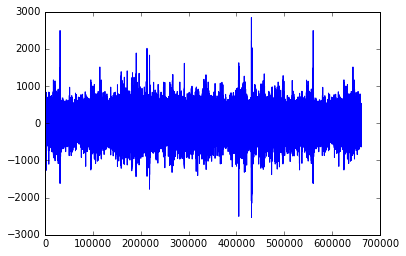

In [31]:
plt.plot(myYsL)

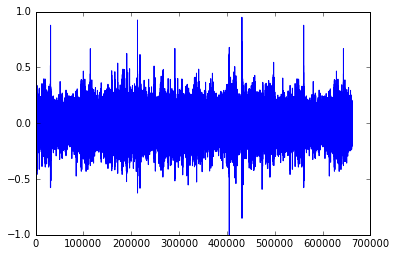

In [32]:
plt.plot(myAudioLeft.ys)

In [33]:
myAudioLeft2, myAudioRight2 = thinkdsp.read_wave('reconstructed mask/reconstructed_oceanwave.wav')

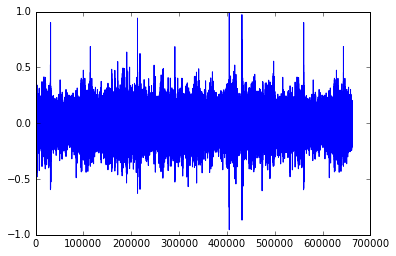

In [34]:
plt.plot(myAudioLeft2.ys)